In [1]:
## data manipulation
import numpy as np
import pandas as pd
from string import ascii_letters

## visualization
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

## preprocessing
from sklearn.preprocessing import OneHotEncoder

## modelling
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', 50)
train_raw = pd.read_csv('input/CSE7302c_train-1539668060821.csv', na_values='?')
train_raw.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,jet2eta,jet2phi,jet2b.tag,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,id
0,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343,1
1,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118,2
2,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904,3
3,0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818,4
4,1,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,0.509783,-1.038338,0.707862,0.000000,0.746918,-0.358465,-1.646654,0.000000,0.367058,0.069496,1.377130,3.101961,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786,5


In [3]:
test_raw = pd.read_csv('input/CSE7302c_test-1539668060821.csv', na_values='?')
test_raw.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,jet2eta,jet2phi,jet2b.tag,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,id
0,1,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487,68637
1,1,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,1.027247,0.534316,1.180022,0.000000,2.405661,0.087557,-0.976534,2.548224,1.250383,0.268541,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364,68638
2,1,1.384098,0.116822,-1.179879,0.762913,-0.079782,1.019863,0.877318,1.276887,2.173076,0.331252,1.409523,-1.474389,0.000000,1.282738,0.737474,-0.225420,0.000000,1.559753,0.846521,0.504809,3.101961,0.959325,0.807376,1.191814,1.221210,0.861141,0.929341,0.838302,68639
3,1,1.330110,0.201557,1.173393,0.135309,-1.083159,0.728461,1.109032,-0.539903,1.086538,0.462444,0.133138,-0.560584,0.000000,0.479095,1.187137,0.657822,0.000000,0.670100,1.007255,0.054775,3.101961,0.782073,0.672103,0.990002,0.734279,0.379074,0.764760,0.642924,68640
4,0,1.289848,-1.423023,-0.687162,0.131103,-1.135935,0.821350,0.296053,0.167582,2.173076,0.696498,-0.469113,-1.151478,1.107436,0.939574,0.273248,1.640813,0.000000,0.720485,1.105529,0.727328,0.000000,1.006643,0.867914,0.999090,1.109608,1.125094,0.882899,0.859396,68641


In [4]:
train_raw.nunique()

class                           2
lepton_pT                   18514
lepton_eta                   8919
lepton_phi                  11806
missing_energy_magnitude    66854
missing_energy_phi          66804
jet1pt                      25954
jet1eta                      9422
jet1phi                     11713
jet1b.tag                       5
jet2pt                      22270
jet2eta                      9658
jet2phi                     11827
jet2b.tag                       5
jet3pt                      17882
jet3eta                     10089
jet3phi                     11753
jet3b.tag                       5
jet4pt                      13935
jet4eta                     10516
jet4phi                     11801
jet4b.tag                       5
m_jj                        65748
m_jjj                       57372
m_lv                        42247
m_jlv                       60935
m_bb                        62851
m_wbb                       63301
m_wwbb                      64483
id            

In [5]:
test_raw.nunique()

class                           2
lepton_pT                   13786
lepton_eta                   7895
lepton_phi                  10476
missing_energy_magnitude    29132
missing_energy_phi          29138
jet1pt                      17678
jet1eta                      7838
jet1phi                     10383
jet1b.tag                       5
jet2pt                      15784
jet2eta                      8145
jet2phi                     10507
jet2b.tag                       5
jet3pt                      13492
jet3eta                      8498
jet3phi                     10487
jet3b.tag                       5
jet4pt                      10920
jet4eta                      8978
jet4phi                      6233
jet4b.tag                       3
m_jj                        28628
m_jjj                       26074
m_lv                        20085
m_jlv                       27166
m_bb                        27697
m_wbb                       27977
m_wwbb                      28235
id            

In [6]:
train_raw['jet1b.tag'].value_counts()

0.000000    33700
2.173076    22387
2.173076     5688
1.086538     5413
1.086538     1448
Name: jet1b.tag, dtype: int64

In [7]:
test_raw['jet1b.tag'].value_counts()

0.000000    14420
2.173076     8774
2.173076     3328
1.086538     2095
1.086538      797
Name: jet1b.tag, dtype: int64

In [8]:
train_raw['jet2b.tag'].value_counts()

0.000000    34289
2.214872    22294
2.214872     5660
1.107436     5135
1.107436     1258
Name: jet2b.tag, dtype: int64

In [9]:
test_raw['jet2b.tag'].value_counts()

0.000000    14722
2.214872     8715
2.214872     3188
1.107436     2003
1.107436      786
Name: jet2b.tag, dtype: int64

In [10]:
train_raw['jet3b.tag'].value_counts()

0.000000    39089
2.548224    19626
2.548224     4906
1.274112     3952
1.274112     1063
Name: jet3b.tag, dtype: int64

In [11]:
test_raw['jet3b.tag'].value_counts()

0.000000    16626
2.548224     7683
2.548224     2855
1.274112     1650
1.274112      600
Name: jet3b.tag, dtype: int64

In [12]:
train_raw['jet4b.tag'].value_counts()

0.000000    44714
3.101961    15800
3.101961     4063
1.550981     3179
1.550981      880
Name: jet4b.tag, dtype: int64

In [13]:
test_raw['jet4b.tag'].value_counts()

0.000000    19044
3.101961     8605
1.550981     1764
Name: jet4b.tag, dtype: int64

In [14]:
(train_raw['class'].value_counts()/train_raw.shape[0])*100

1    52.857101
0    47.142899
Name: class, dtype: float64

In [15]:
(test_raw['class'].value_counts()/test_raw.shape[0])*100

1    52.859183
0    47.140817
Name: class, dtype: float64

In [16]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29414 entries, 0 to 29413
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     29414 non-null  int64  
 1   lepton_pT                 29414 non-null  float64
 2   lepton_eta                29414 non-null  float64
 3   lepton_phi                29414 non-null  float64
 4   missing_energy_magnitude  29414 non-null  float64
 5   missing_energy_phi        29414 non-null  float64
 6   jet1pt                    29414 non-null  float64
 7   jet1eta                   29414 non-null  float64
 8   jet1phi                   29414 non-null  float64
 9   jet1b.tag                 29414 non-null  float64
 10  jet2pt                    29414 non-null  float64
 11  jet2eta                   29414 non-null  float64
 12  jet2phi                   29414 non-null  float64
 13  jet2b.tag                 29414 non-null  float64
 14  jet3pt

In [17]:
test_raw.shape[0]

29414

In [18]:
## drop loast row since that has all the NA values
test_raw.drop(test_raw.index[[test_raw.shape[0]-1]], inplace=True)
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29413 entries, 0 to 29412
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     29413 non-null  int64  
 1   lepton_pT                 29413 non-null  float64
 2   lepton_eta                29413 non-null  float64
 3   lepton_phi                29413 non-null  float64
 4   missing_energy_magnitude  29413 non-null  float64
 5   missing_energy_phi        29413 non-null  float64
 6   jet1pt                    29413 non-null  float64
 7   jet1eta                   29413 non-null  float64
 8   jet1phi                   29413 non-null  float64
 9   jet1b.tag                 29413 non-null  float64
 10  jet2pt                    29413 non-null  float64
 11  jet2eta                   29413 non-null  float64
 12  jet2phi                   29413 non-null  float64
 13  jet2b.tag                 29413 non-null  float64
 14  jet3pt

In [19]:
test_raw.isna().sum()

class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet1pt                      0
jet1eta                     0
jet1phi                     0
jet1b.tag                   0
jet2pt                      0
jet2eta                     0
jet2phi                     0
jet2b.tag                   0
jet3pt                      0
jet3eta                     0
jet3phi                     0
jet3b.tag                   0
jet4pt                      0
jet4eta                     0
jet4phi                     0
jet4b.tag                   0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
id                          0
dtype: int64

In [20]:
## we know that 
# train size:  68636  observations  30 attributes
# test size:   29414 observations 30 attributes

# We have 68636 and 29414 unique ids in train and test respectively and this nominal data can be removed.
# Let's also remove target variable
train_data = train_raw.drop(['id', 'class'], axis=1)
test_data = test_raw.drop(['id', 'class'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_raw['class'], test_size=0.3, random_state=42)
X_test, y_test = test_data, test_raw['class'].astype('category')

In [22]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_valid: {X_valid.shape}')
print(f'shape of X_test: {X_test.shape}')

shape of X_train: (48045, 28)
shape of X_valid: (20591, 28)
shape of X_test: (29413, 28)


In [23]:
cat_cols = X_train.columns[X_train.nunique() <= 5]
print(cat_cols)
num_cols = X_train.columns[X_train.nunique() > 5]
num_cols

Index(['jet1b.tag', 'jet2b.tag', 'jet3b.tag', 'jet4b.tag'], dtype='object')


Index(['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet2pt',
       'jet2eta', 'jet2phi', 'jet3pt', 'jet3eta', 'jet3phi', 'jet4pt',
       'jet4eta', 'jet4phi', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb',
       'm_wwbb'],
      dtype='object')

In [24]:
## type casting
# train
X_train_cat = X_train[cat_cols].astype('category')
# validation
X_valid_cat = X_valid[cat_cols].astype('category')
# test
X_test_cat = X_test[cat_cols].astype('category')

In [25]:
## create a df with for num columns
# train
X_train_num = X_train[num_cols].reset_index()
X_train_num.drop('index', axis=1, inplace=True)
# validation
X_valid_num = X_valid[num_cols].reset_index()
X_valid_num.drop('index', axis=1, inplace=True)
# test
X_test_num = X_test[num_cols].reset_index()
X_test_num.drop('index', axis=1, inplace=True)

#### Encoding Categorical Attributes to Numeric - OneHotEncoding

In [26]:
## LabelEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')

## Fit method
onehotencoder = onehotencoder.fit(X_train[cat_cols])

## Get names for new columns
ohe_cat_col_names = onehotencoder.get_feature_names(cat_cols)

## Print the above columns names
ohe_cat_col_names

array(['jet1b.tag_0.0', 'jet1b.tag_1.086538',
       'jet1b.tag_1.0865380759999999', 'jet1b.tag_2.173076',
       'jet1b.tag_2.1730761530000002', 'jet2b.tag_0.0',
       'jet2b.tag_1.107436', 'jet2b.tag_1.107436061',
       'jet2b.tag_2.214872', 'jet2b.tag_2.214872122', 'jet3b.tag_0.0',
       'jet3b.tag_1.2741120000000001', 'jet3b.tag_1.274112225',
       'jet3b.tag_2.5482240000000003', 'jet3b.tag_2.548224449',
       'jet4b.tag_0.0', 'jet4b.tag_1.5509806869999998',
       'jet4b.tag_1.550981', 'jet4b.tag_3.101961',
       'jet4b.tag_3.1019613739999996'], dtype=object)

In [27]:
## Encode X_train category columns 
X_train_cat_onehotencoded = onehotencoder.transform(X_train[cat_cols]).toarray()
X_train_cat_onehotencoded = pd.DataFrame(X_train_cat_onehotencoded, columns=ohe_cat_col_names)
print(f'shape of X_train_cat_onehotencoded: {X_train_cat_onehotencoded.shape}')
X_train_cat_onehotencoded.head()

shape of X_train_cat_onehotencoded: (48045, 20)


,jet1b.tag_0.0,jet1b.tag_1.086538,jet1b.tag_1.0865380759999999,jet1b.tag_2.173076,jet1b.tag_2.1730761530000002,jet2b.tag_0.0,jet2b.tag_1.107436,jet2b.tag_1.107436061,jet2b.tag_2.214872,jet2b.tag_2.214872122,jet3b.tag_0.0,jet3b.tag_1.2741120000000001,jet3b.tag_1.274112225,jet3b.tag_2.5482240000000003,jet3b.tag_2.548224449,jet4b.tag_0.0,jet4b.tag_1.5509806869999998,jet4b.tag_1.550981,jet4b.tag_3.101961,jet4b.tag_3.1019613739999996
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [28]:
## Encode X_valid category columns 
X_valid_cat_onehotencoded = onehotencoder.transform(X_valid[cat_cols]).toarray()
X_valid_cat_onehotencoded = pd.DataFrame(X_valid_cat_onehotencoded, columns=ohe_cat_col_names)
print(f'shape of X_valid_cat_onehotencoded: {X_valid_cat_onehotencoded.shape}')
X_valid_cat_onehotencoded.head()

shape of X_valid_cat_onehotencoded: (20591, 20)


,jet1b.tag_0.0,jet1b.tag_1.086538,jet1b.tag_1.0865380759999999,jet1b.tag_2.173076,jet1b.tag_2.1730761530000002,jet2b.tag_0.0,jet2b.tag_1.107436,jet2b.tag_1.107436061,jet2b.tag_2.214872,jet2b.tag_2.214872122,jet3b.tag_0.0,jet3b.tag_1.2741120000000001,jet3b.tag_1.274112225,jet3b.tag_2.5482240000000003,jet3b.tag_2.548224449,jet4b.tag_0.0,jet4b.tag_1.5509806869999998,jet4b.tag_1.550981,jet4b.tag_3.101961,jet4b.tag_3.1019613739999996
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
## Encode X_test category columns 
X_test_cat_onehotencoded = onehotencoder.transform(X_test[cat_cols]).toarray()
X_test_cat_onehotencoded = pd.DataFrame(X_test_cat_onehotencoded, columns=ohe_cat_col_names)
print(f'shape of X_test_cat_onehotencoded: {X_test_cat_onehotencoded.shape}')
X_test_cat_onehotencoded.head()

shape of X_test_cat_onehotencoded: (29413, 20)


,jet1b.tag_0.0,jet1b.tag_1.086538,jet1b.tag_1.0865380759999999,jet1b.tag_2.173076,jet1b.tag_2.1730761530000002,jet2b.tag_0.0,jet2b.tag_1.107436,jet2b.tag_1.107436061,jet2b.tag_2.214872,jet2b.tag_2.214872122,jet3b.tag_0.0,jet3b.tag_1.2741120000000001,jet3b.tag_1.274112225,jet3b.tag_2.5482240000000003,jet3b.tag_2.548224449,jet4b.tag_0.0,jet4b.tag_1.5509806869999998,jet4b.tag_1.550981,jet4b.tag_3.101961,jet4b.tag_3.1019613739999996
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
X_train = pd.concat([X_train_cat_onehotencoded, X_train_num], axis=1)
X_train.shape

(48045, 44)

In [31]:
X_valid = pd.concat([X_valid_cat_onehotencoded, X_valid_num], axis=1)
X_valid.shape

(20591, 44)

In [32]:
X_test = pd.concat([X_test_cat_onehotencoded, X_test_num], axis=1)
X_test.shape

(29413, 44)

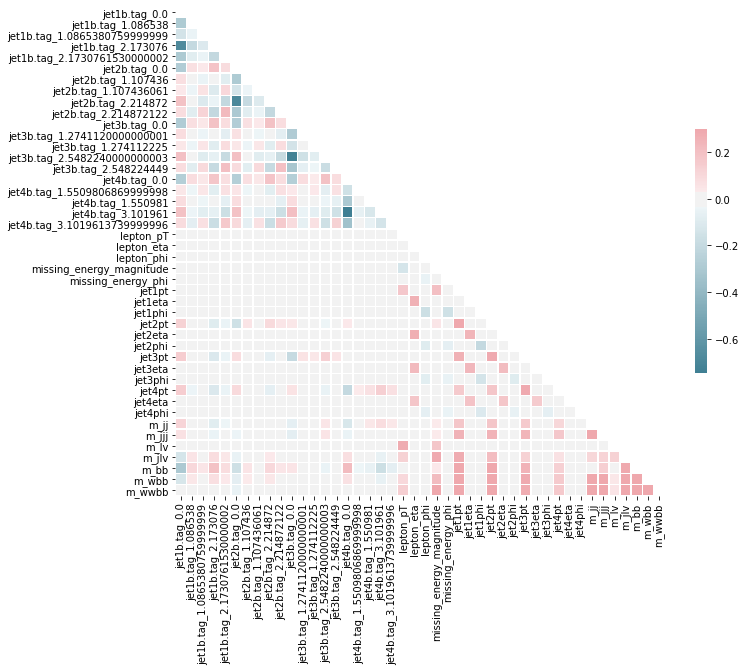

In [33]:
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
## Not that easy to gain insights
## Let's take a look at categorical variables
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
# classVsjet1b = cramers_v(y_train, train_data['jet1b.tag'])
# classVsjet1b

## Modelling

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# grid params
grid_nb = {'var_smoothing':[1]}
# model object
model_nb = GaussianNB()
# grid object
gs_object_nb = GridSearchCV(estimator=model_nb, param_grid=grid_nb, cv = kfold, n_jobs=-1)
# fit on train
gs_object_nb.fit(X_train, y_train)
# predict on train
y_train_pred = gs_object_nb.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_nb.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [36]:
## plain vanilla NB
from sklearn.naive_bayes import GaussianNB
# model object
nb = GaussianNB()
# fit on train
nb.fit(X_train, y_train)
# predict on train
y_train_pred = nb.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = nb.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

train accuracy: 0.5934644604017068
test accuracy: 0.5852514194403835


In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# fit on train
nb.fit(X_train_scaled, y_train)
# predict on train
y_train_pred = nb.predict(X_train_scaled)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = nb.predict(X_test_scaled)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

train accuracy: 0.5934644604017068
test accuracy: 0.590963179546459


## Logistic Regression

In [ ]:
## Plain vanilla
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
y_test_pred = log_reg.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [ ]:
# grid params
grid_lr = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# model object
model_lr = LogisticRegression()
# grid object
gs_object_lr = GridSearchCV(estimator=model_lr, param_grid=grid_lr, cv = kfold, n_jobs=-1, verbose=5)
# fit on train
gs_object_lr.fit(X_train, y_train)
print('\n')
# best params
print(f'best_params: {gs_object_lr.best_params_}')
# best estimator
print(f'best_estimator: {gs_object_lr.best_estimator_}')
# predict on train
y_train_pred = gs_object_lr.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_lr.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [ ]:
# grid params
grid_lr = {'solver':['newton-cg'], 'penalty':['none']}
# model object
model_lr = LogisticRegression()
# grid object
gs_object_lr = GridSearchCV(estimator=model_lr, param_grid=grid_lr, cv = kfold, n_jobs=-1, verbose=5)
# fit on train
gs_object_lr.fit(X_train, y_train)
print('\n')
# best params
print(f'best_params: {gs_object_lr.best_params_}')
# best estimator
print(f'best_estimator: {gs_object_lr.best_estimator_}')
# predict on train
y_train_pred = gs_object_lr.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_lr.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

## Linear Support Vector Classifier

In [ ]:
## plain vanilla
from sklearn.svm import LinearSVC
livearSVC = LinearSVC(max_iter=50000)
livearSVC.fit(X_train, y_train)
y_train_pred = livearSVC.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
y_test_pred = livearSVC.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [ ]:
from sklearn.svm import LinearSVC
# grid params
grid_lsvc = {'penalty':[str, 'l1','l2'], 'C':[1.0, 0.9, 0.8]}
# model object
model_lsvc = LinearSVC(max_iter=50000)
# grid object
gs_object_lsvc = GridSearchCV(estimator=model_lsvc, param_grid=grid_lsvc, cv = kfold, n_jobs=-1, verbose=5)
# fit on train
gs_object_lsvc.fit(X_train, y_train)
# predict on train
y_train_pred = gs_object_lsvc.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_lsvc.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [ ]:
# best params
print(f'best_params: {gs_object_lsvc.best_params_}')
# best estimator
print(f'best_estimator: {gs_object_lsvc.best_estimator_}')

In [36]:
# grid params
grid_lsvc = {'penalty':['l2'], 'C':[1.0]}
# model object
model_lsvc = LinearSVC(max_iter=75000)
# grid object
gs_object_lsvc = GridSearchCV(estimator=model_lsvc, param_grid=grid_lsvc, cv = kfold, n_jobs=-1, verbose=5)
# fit on train
gs_object_lsvc.fit(X_train, y_train)
print('\n')
# best params
print(f'best_params: {gs_object_lsvc.best_params_}')
# best estimator
print(f'best_estimator: {gs_object_lsvc.best_estimator_}')
# predict on train
y_train_pred = gs_object_lsvc.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_lsvc.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished




best_params: {'C': 1.0, 'penalty': 'l2'}
best_estimator: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=75000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
train accuracy: 0.6400874180455822
test accuracy: 0.6395131404481011


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# grid params
grid_lsvc = {'penalty':['l2'], 'C':[1.0]}
# model object
model_lsvc = LinearSVC(max_iter=75000)
# grid object
gs_object_lsvc = GridSearchCV(estimator=model_lsvc, param_grid=grid_lsvc, n_jobs=-1, cv = kfold, verbose=5)
# fit on train
gs_object_lsvc.fit(X_train_scaled, y_train)
print('\n')
# best params
print(f'best_params: {gs_object_lsvc.best_params_}')
# best estimator
print(f'best_estimator: {gs_object_lsvc.best_estimator_}')
# predict on train
y_train_pred = gs_object_lsvc.predict(X_train_scaled)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_lsvc.predict(X_test_scaled)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.6min remaining: 11.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.0min finished


## K Nearest Neighbors Classifier

In [ ]:
## plain vanilla
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
y_test_pred = knn.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [ ]:
# grid params
grid_knn = {'loss':[str, 'hinge', 'squared_hinge'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2]}
# model object
model_knn = KNeighborsClassifier()
# grid object
gs_object_knn = GridSearchCV(estimator=model_knn, param_grid=grid_knn, cv = kfold, n_jobs=-3, verbose=5)
# fit on train
gs_object_knn.fit(X_train, y_train)
# predict on train
y_train_pred = gs_object_knn.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
# predict on test
y_test_pred = gs_object_knn.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

In [39]:
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_train_pred = model_dt.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
y_test_pred = model_dt.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

train accuracy: 1.0
test accuracy: 0.6265596844932513


In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, y_train)
y_train_pred = random_forest.predict(X_train)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
y_test_pred = random_forest.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

train accuracy: 1.0
test accuracy: 0.7086662360180872


In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train_scaled, y_train)
y_train_pred = random_forest.predict(X_train_scaled)
print(f'train accuracy: {accuracy_score(y_train, y_train_pred)}')
y_test_pred = random_forest.predict(X_test_scaled)
print(f'test accuracy: {accuracy_score(y_test, y_test_pred)}')

train accuracy: 1.0
test accuracy: 0.7095841974637065


In [ ]:
prediction = pd.DataFrame(y_test_pred, columns=['predictions'])
id = pd.DataFrame(test_raw['id'], columns=['id'])
output = pd.concat([id, prediction], axis=1).to_csv('output/prediction_2.csv', index=None)